# 概述

---

Numpy 是一个非常流行的 Python 模块，它提供了非常丰富的对数组和矩阵的操作，常被用于数据分析。

相比 Python 自己的 `list` 数据类型，Numpy 的特点是速度快。Numpy 的底层使用 C 模块实现固定长度数据的运算。

此外，numpy 允许一些 python `list` 不允许进行的运算，例如数组一对一相乘：

In [1]:
import numpy as np

a = np.array([1,3,5])
b = np.array([2,4,6])

a*b

array([ 2, 12, 30])

上面的运算用普通的 `list` 是不允许的:

In [2]:
a = [1,2,3]
b = [2,4,6]

a*b    # ERROR

TypeError: can't multiply sequence by non-int of type 'list'

Numpy 可以与多种流行的数据分析工具联用，例如 matplotlib，Mathmatics，Pandas 等工具的底层都使用了 numpy。

## Numpy 基础

---

**安装：**
```
pip3 install numpy
```

载入 numpy：
```python
import numpy as np
```

### 定义一个 numpy array

---

定义一个一维的 numpy array

In [3]:
a = np.array([1,2,3])

定义一个二维的 numpy array

In [4]:
b = np.array([[1,2,3], [4,5,6]])

获取 numpy 数组的的维度

In [5]:
a.ndim

1

获取 numpy 数组的形状

In [6]:
b.shape     # (2,3) 表示 2 排，3 列的数组

(2, 3)

获取 numpy 数组的数据类型

In [7]:
b.dtype   # numpy 默认使用 int64，可以在创建时设置 dtype='int32' 等进行指定

dtype('int64')

查看 numpy 数组的数据类型的大小，以及整个 array 所使用的内存

In [8]:
print(b.itemsize)    # 每个数组元素的大小，字节为单位
print(b.nbytes)      # 整个 numpy 数组所使用的内存，字节为单位

8
48


与普通的 list 类似，numpy array 也通过下标访问数组元素：

In [9]:
a = np.array([[1,2,3,4,5,6,7,8], [9,10,11,12,13,14,15,16]])
print(a)

a[1,5]   # 访问第2行，第6列的数据（下标从 0 开始）

[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]]


14

与普通 list 不一样的是，numpy array 允许使用 `:` 范围符号来指定整行或整列：

In [10]:
a[0, :]       # 取出第 1 行所有的列，':' 代表列的范围

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
a[1, :3]      # 取出第 2 行的前三列

array([ 9, 10, 11])

此外，numpy array 还允许每间隔隔几个元素取出数据，通过 `[start:end:stepsize]` 的语法：

In [12]:
a[:, ::2]     # 从每一行中，每间隔 2 个元素

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15]])

numpy 还可以生成各种经过初始化的数组，例如全 0 的数组和全 1 的数组，或者指定的数字初始化的数组，甚至随机数字初始化的数组：

In [13]:
a = np.zeros((3,2))        # 生成一个 3 行 2 列的全 0 二维数组
b = np.ones((1,2,3))       # 生成一个 1 行 2 列，高度 3 的三维数组
c = np.random.randn(3,3)   # 生成一个随机数初始化的 3x3 数组
d = np.full((3,3), 101)    # 生成一个全部数字都是 101 的 3x3 数组

print(f"a:\n{'-'*10}\n{a}")
print(f"b:\n{'-'*10}\n{b}")
print(f"c:\n{'-'*10}\n{c}")
print(f"d:\n{'-'*10}\n{d}")

a:
----------
[[0. 0.]
 [0. 0.]
 [0. 0.]]
b:
----------
[[[1. 1. 1.]
  [1. 1. 1.]]]
c:
----------
[[-0.48672901  0.62357302 -0.92008365]
 [-1.27536868  1.22204616  0.27750272]
 [ 1.04205537  1.49995888 -1.83379882]]
d:
----------
[[101 101 101]
 [101 101 101]
 [101 101 101]]


numpy 的 random 对象可以生成各种随机数，例如上面所示的 `randn()` 是生成正态分布的随机数。
如果需要生成某一个范围的整数随机数，可以使用 `numpy.random.randint()`：

In [14]:
# 生成一个 3x3 的数组，用 -8~8 之间的随机整数初始化
a = np.random.randint(-8, 8, size=(3,3))
a

array([[ 0,  4,  4],
       [ 3,  1, -3],
       [ 7,  6,  0]])

numpy 还可以生成单位矩阵：

In [15]:
# 生成一个 5x5 的单位矩阵，数据类型是 int16
np.identity(5, dtype='int16')

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int16)

numpy 提供了一系列的操作数组的函数，例如数组的复制和扩展。`numpy.repeat()` 函数将数组进行重复：

In [16]:
# 将数组重复扩展 3 次
a = np.array([1,2,3])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [17]:
# 将一个二维数组沿着 axis 0 重复扩展 2 次
a = np.array([[1,2,3], [4,5,6]])
np.repeat(a, 2, axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6]])

numpy array 是有 “轴” （axis）的概念的数组。对于一维数组，它的 axis 就是沿着数组方向的直线：
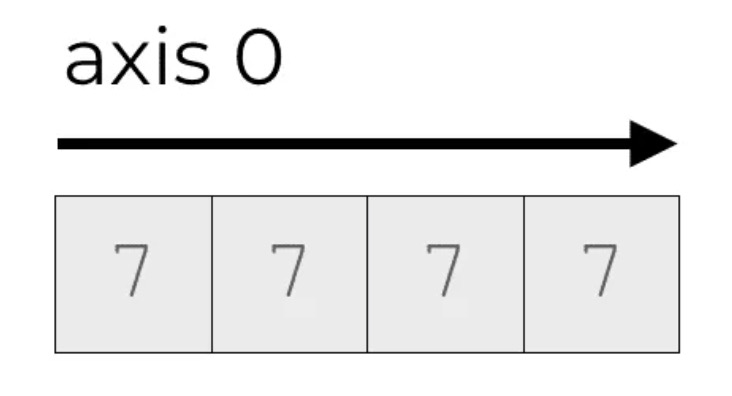

对于二维数组，它的 axis 就有 2 个，分别是沿着 2 个维度的直线：
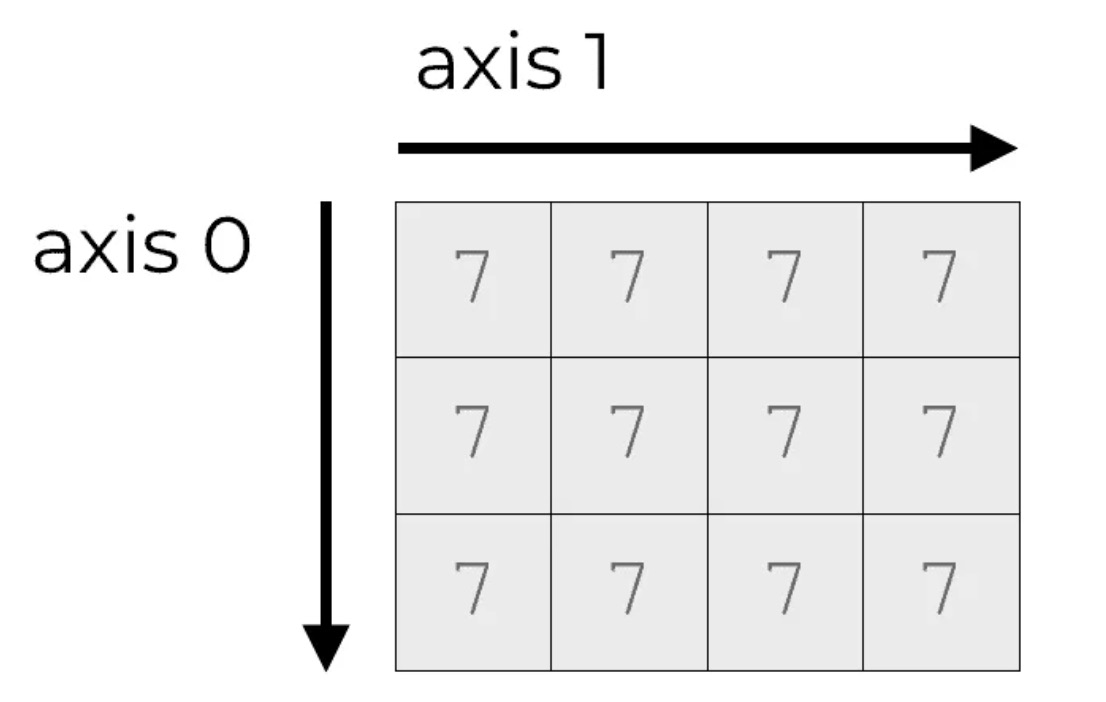

实际上 numpy array 的 axis 还比较重要，因为在许多函数中会使用 axis 指定运算的方向。上面的 repeat 函数就是一个例子。

通过灵活地使用前面的方法，可以初始化一些较为复杂的数组（矩阵）。例如下面的矩阵：
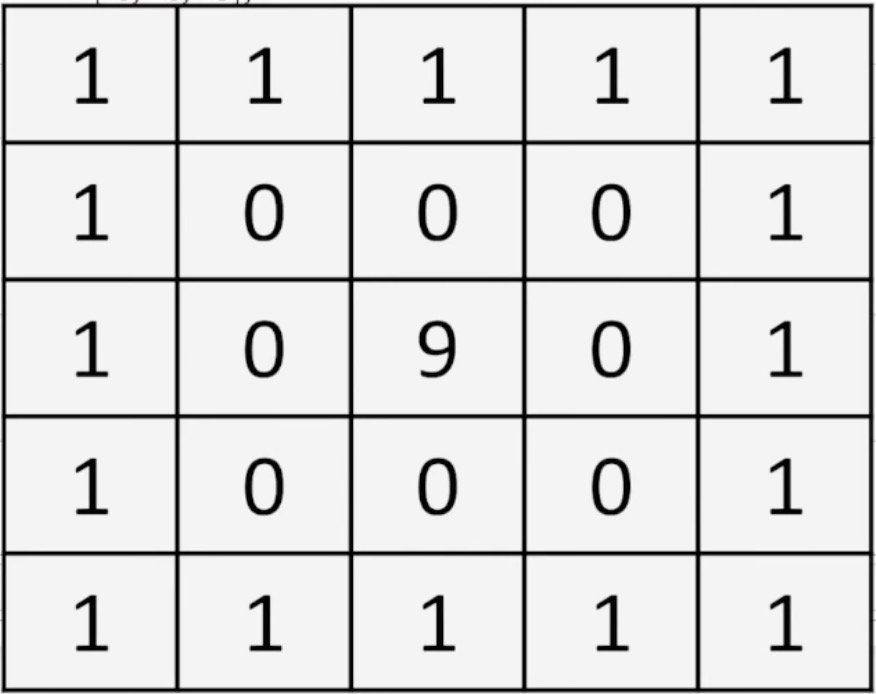

图中是一个 5x5 的矩阵，周围一圈以 1 围绕，中间部分是 0，正中位置是 9。我们可以使用前面的方法，用代码进行初始化，而无需手动给这个矩阵赋初值：

In [18]:
X = np.ones((5,5))   # 首先生成一个全 1 的 5x5 矩阵
print(X)
z = np.zeros((3,3))  # 生成一个全 0 的 3x3 矩阵
print(z)
z[1,1] = 9           # 将最中心的元素设置为 9
print(z)
X[1:4,1:4] = z       # 将 X 矩阵的中心部分用 z 替换
print(X)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 9. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 9. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


这样，通过组合各种方法，就生成了符合目标的矩阵。

在使用 numpy array 时需要注意与普通 list 同样的问题：array 变量只是 array 对象的引用，一个 Python 对象可以有多个引用，而修改 list 或 numpy array 的元素，会直接在位修改其所指向的对象。例如下面的代码中，修改 b 的元素也会导致 a 中元素的变化：

```python
a = np.array([1,2,3])
b = a
b[0] = 100      # a[0] 也会变成 100
```

因此在需要完全复制一个 numpy array 时，应该使用 `deep_copy` 方法：

In [19]:
a = np.array([1,2,3])
b = a.copy()   # 或者写成 np.copy(a)，执行 deep copy
b[0] = 100

print(a)
print(b)

[1 2 3]
[100   2   3]


## 数学运算

---

numpy 最大的优势是在于它提供了非常丰富的数学运算。

### 逐个元素运算

---

numpy 可以非常方便地对数组中的每个元素进行运算，而无需编写循环块。

**四则运算**

---

In [20]:
a = np.array([1,2,3])
print(a)

[1 2 3]


In [21]:
a + 2

array([3, 4, 5])

In [22]:
a - 2

array([-1,  0,  1])

In [23]:
a * 2

array([2, 4, 6])

In [24]:
a / 2

array([0.5, 1. , 1.5])

In [25]:
a ** 2

array([1, 4, 9])

In [26]:
a += 2
print(a)

[3 4 5]


In [27]:
# numpy array 可以直接与 list 进行交互和运算

b = [2,4,6]
a + b

array([ 5,  8, 11])

**三角函数**

---

In [28]:
np.sin(a)

array([ 0.14112001, -0.7568025 , -0.95892427])

In [29]:
np.cos(a)

array([-0.9899925 , -0.65364362,  0.28366219])

In [30]:
np.tan(a)

array([-0.14254654,  1.15782128, -3.38051501])

其他还有许多的数学函数，可以参考这里：https://docs.scipy.org/doc/numpy/reference/routines.math.html

### 线性代数

---

numpy 最强的功能当属它提供的矩阵相关运算。在机器学习等领域，大量地使用了 numpy 的矩阵运算。

实际上，在机器学习相关的代码中，经常开到代码的开头是：

```python
import numpy as np
import pandas as pd
import matplotlib as plt
```

这里面，numpy 被用于 tensor 运算（tensor 是多维矩阵的数学术语），pandas 被用于数据的关联分析，而 matplotlib 被用于数据的可视化。

In [31]:
a = np.ones((2,3))
b = np.full((3,2), 2)
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[2 2]
 [2 2]
 [2 2]]


**矩阵运算**

---

In [32]:
np.matmul(a,b)   # 矩阵乘法，2x3 矩阵与 3x2 矩阵相乘，其结果为一个 2x2 矩阵

array([[6., 6.],
       [6., 6.]])

其他的线性代数相关算法可以参考这里：https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

### 统计算法

---

In [33]:
a = np.array([[3, 8, 5], [7, 11, 9]])

In [34]:
a.max()

11

In [35]:
a.min()

3

In [36]:
a.mean()

7.166666666666667

In [37]:
a.max(axis=0)

array([ 7, 11,  9])

In [38]:
a.min(axis=1)

array([3, 7])

In [39]:
a.sum()

43

In [40]:
a.sum(axis=0)

array([10, 19, 14])

In [41]:
a.sum(axis=1)

array([16, 27])

### 数组变形

---

通过 `reshape()` 函数变形数组：

In [42]:
before = np.array([[1,2,3,4], [5,6,7,8]])
print(before)

after = before.reshape((8,1))
print(after)

[[1 2 3 4]
 [5 6 7 8]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]


In [43]:
after = before.reshape((2,2,2))
print(after)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


**纵向堆叠矩阵：**

In [44]:
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
v3 = np.array([9,10,11,12])

np.vstack([v1,v2,v3])

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

**横向堆叠矩阵：**

In [45]:
h1 = np.array((2,4))
h2 = np.array((2,2))

np.hstack((h1,h2,h1))

array([2, 4, 2, 2, 2, 4])

### 其他

---

#### 从文件中载入数据到 numpy array

---


一般来讲，对于大量的保存在文件中的数据应该使用 pandas 进行载入和分析。但 numpy 也能轻易地从文件中载入数据到 numpy array 中。

下面是一个数据文件的内容，是以逗号分割的数字，保存在路径 `data/data.txt` 中：
```
1,13,21,11,196,75,4,3,34,6,7,8,0,1,2,3,4,5
3,42,12,33,766,75,4,55,6,4,3,4,5,6,7,0,11,12
1,22,33,11,999,11,2,1,78,0,1,2,9,8,7,1,76,88
```

numpy 提供了 `genfromtxt()` 函数来读取这种类型的文本文件：

In [46]:
data_from_file = np.genfromtxt("data/data.txt", delimiter=',')
data_from_file

array([[  1.,  13.,  21.,  11., 196.,  75.,   4.,   3.,  34.,   6.,   7.,
          8.,   0.,   1.,   2.,   3.,   4.,   5.],
       [  3.,  42.,  12.,  33., 766.,  75.,   4.,  55.,   6.,   4.,   3.,
          4.,   5.,   6.,   7.,   0.,  11.,  12.],
       [  1.,  22.,  33.,  11., 999.,  11.,   2.,   1.,  78.,   0.,   1.,
          2.,   9.,   8.,   7.,   1.,  76.,  88.]])

In [47]:
data_from_file.astype("int32")

array([[  1,  13,  21,  11, 196,  75,   4,   3,  34,   6,   7,   8,   0,
          1,   2,   3,   4,   5],
       [  3,  42,  12,  33, 766,  75,   4,  55,   6,   4,   3,   4,   5,
          6,   7,   0,  11,  12],
       [  1,  22,  33,  11, 999,  11,   2,   1,  78,   0,   1,   2,   9,
          8,   7,   1,  76,  88]], dtype=int32)

#### 布尔掩码和高级索引

---

numpy 支持非常灵活的数组生成方式。例如通过比较操作符可以对每个元素进行判断，生成同样形状的结果数组：

In [48]:
data_from_file > 50

array([[False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False,  True,
        False, False, False, False, False, False, False,  True,  True]])

上面的代码产生了一个与原数组相同形状的数组，其中值为 true 和 false 代表在原数组对应位置的元素是否大于 50.

除了上面的直接比较之外，numpy 甚至可以在数组下标中使用比较操作符，用作一个高级过滤器：

In [49]:
data_from_file[data_from_file > 50]

array([196.,  75., 766.,  75.,  55., 999.,  78.,  76.,  88.])

上面的代码从所有数据中筛选出了所有大于 50 的数据。

上面的数组下标之所以能工作，是因为 numpy 的另一个功能：**下标掩码**。即，可以给 numpy array 的下班指定一个 boolean array 作为掩码，False 表示不选，True 表示选中。例如下面的数组，我们只想选择其中的 2 和 5，可以这么做：

In [50]:
a = np.array([1,2,3,4,5])
a[[False,True,False,False,True]]

array([2, 5])

除此之外，还可以用一个 int array 直接给出需要选择的下标：

In [51]:
a[[1,4]]

array([2, 5])

下面的例子显示了 numpy 下标索引的灵活用法：

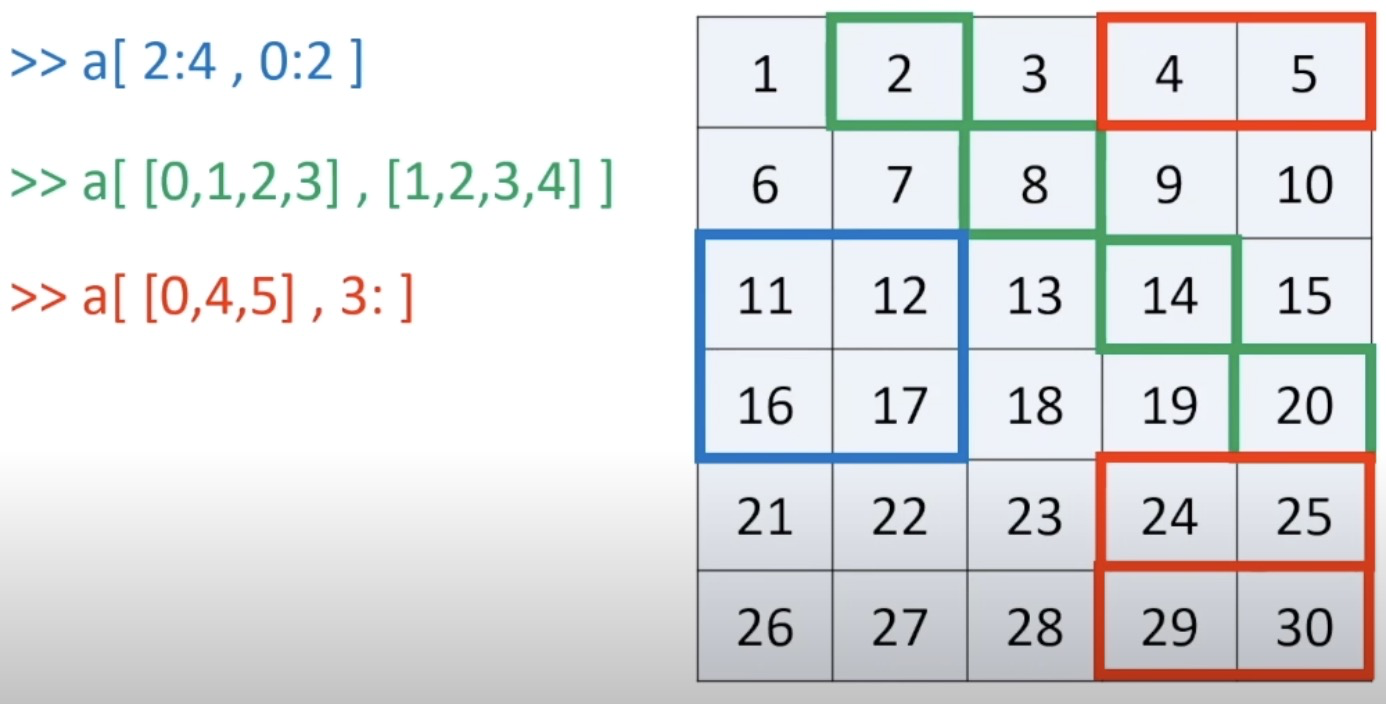